#Task 8: Clustering with K-Means

Objective: Perform unsupervised learning with K-Means clustering.

Tools: Scikit-learn, Pandas, Matplotlib

In [18]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [19]:
import kagglehub

# Download latest version of the dataset from Kaggle
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [20]:
# Read the downloaded CSV file into a pandas DataFrame
df = pd.read_csv(path + "/Mall_Customers.csv")

In [21]:
# Display the first 5 rows of the DataFrame to inspect the data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
# Drop the 'CustomerID' column as it is not needed for clustering
df.drop(["CustomerID"], axis=1, inplace=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

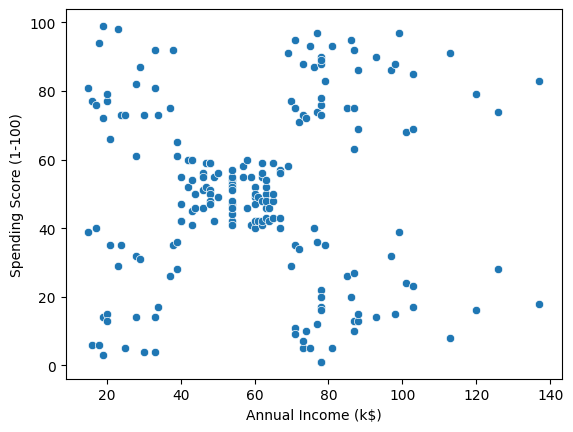

In [23]:
# Create a scatter plot to visualize the relationship between Annual Income and Spending Score
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

In [24]:
# Initialize KMeans with 5 clusters
km = KMeans(n_clusters=5)

# Fit the KMeans model to the Annual Income and Spending Score data
km.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])

KMeans(n_clusters=5)

In [25]:
# Fit the KMeans model and predict the clusters based on Age, Annual Income, and Spending Score
y_prediction = km.fit_predict(df[["Age","Annual Income (k$)","Spending Score (1-100)"]])

In [26]:
# Display the predicted cluster labels
y_prediction

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0], dtype=int32)

In [27]:
# Add the predicted cluster labels as a new column to the DataFrame
df['cluster'] = y_prediction

# Display the first 5 rows of the DataFrame with the new cluster column
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


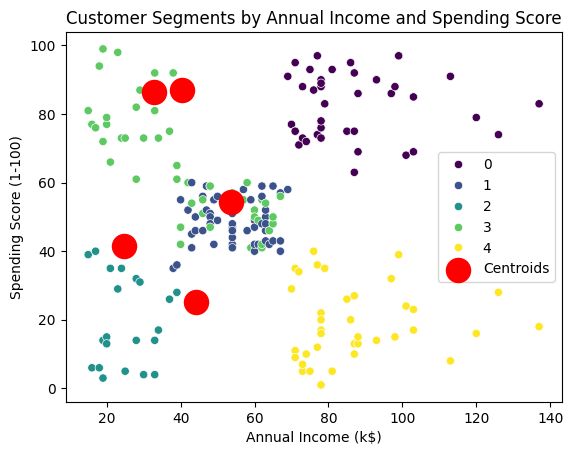

In [30]:
# Create a scatter plot to visualize the clusters based on Annual Income and Spending Score
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="cluster", data=df, palette='viridis')

# Plot the cluster centers
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=300, c='red', label='Centroids')

# Add labels and title to the plot
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments by Annual Income and Spending Score')
plt.legend()

# Display the plot
plt.show()

In [31]:
# Display the coordinates of the cluster centers
km.cluster_centers_

array([[32.69230769, 86.53846154, 82.12820513],
       [53.71153846, 54.42307692, 48.73076923],
       [44.14285714, 25.14285714, 19.52380952],
       [24.8       , 41.46      , 63.7       ],
       [40.39473684, 87.        , 18.63157895]])

In [33]:
# Determine the range of k values to test for the Elbow method
k_rng = range(1,10)
sse = []

# Calculate the Sum of Squared Errors (SSE) for each k
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])
    sse.append(km.inertia_)

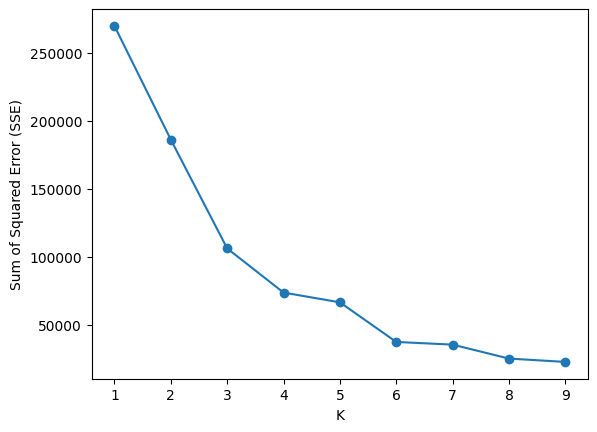

In [35]:
# Plot the SSE for each k to find the optimal number of clusters using the Elbow method
plt.xlabel('K')
plt.ylabel('Sum of Squared Error (SSE)')
plt.plot(k_rng,sse,'o-')
plt.show()

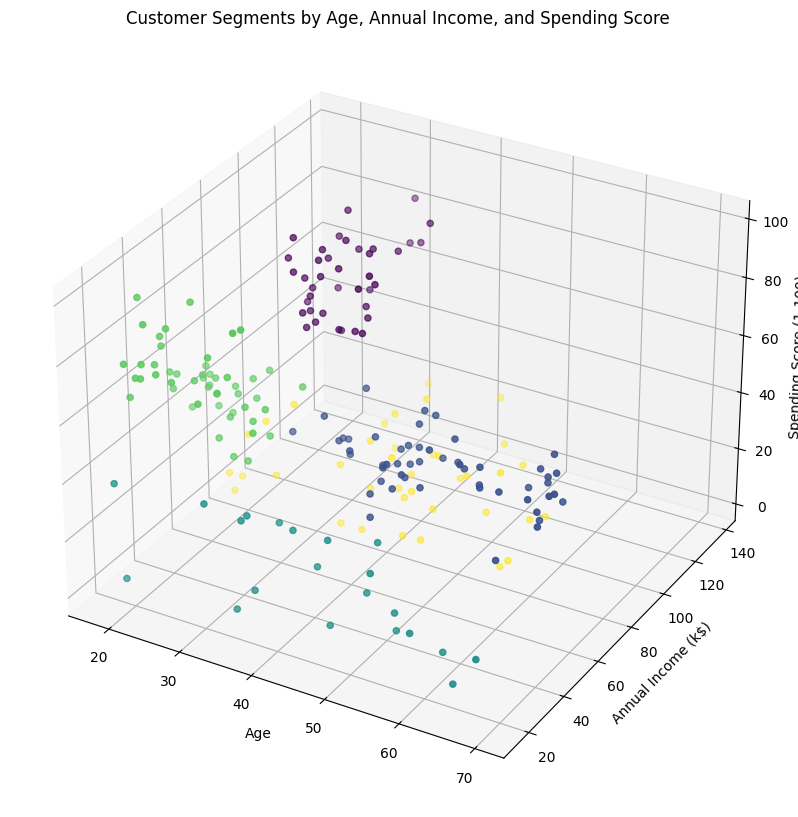

In [42]:
# Create a 3D scatter plot to visualize the clusters based on Age, Annual Income, and Spending Score
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with colors based on their cluster
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster'], cmap='viridis')

# Add labels and title to the plot
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer Segments by Age, Annual Income, and Spending Score')

# Display the plot
plt.show()